<a href="https://colab.research.google.com/github/tenonin/apollo-photos/blob/main/Vet4All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
import requests
import tarfile
from pathlib import Path

os.mkdir('data')

data_path = Path('data/')
image_path = data_path / 'dogs_breeds'

In [3]:
if image_path.is_dir():
    print('Already exists')
else:
    print('Creating dataset')
    image_path.mkdir(parents=True,exist_ok=True)

with open(data_path / 'dog_breeds.tar','wb') as f:
    requests = requests.get('http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar')
    print('Downloading dog breeds data...')
    f.write(requests.content)

with tarfile.TarFile(data_path / 'dog_breeds.tar','r') as tar_ref:
        print('Unziping dog breeds data...')
        tar_ref.extractall(image_path)
        Path(image_path / 'Images').rename(Path(image_path / 'train'))

Creating dataset
Unziping dog breeds data...


In [4]:
data_path, image_path

(PosixPath('data'), PosixPath('data/dogs_breeds'))

In [5]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [6]:
walk_through_dir(image_path)

There are 1 directories and 0 images in 'data/dogs_breeds'
There are 120 directories and 0 images in 'data/dogs_breeds/train'
There are 0 directories and 155 images in 'data/dogs_breeds/train/n02100877-Irish_setter'
There are 0 directories and 153 images in 'data/dogs_breeds/train/n02089867-Walker_hound'
There are 0 directories and 171 images in 'data/dogs_breeds/train/n02099712-Labrador_retriever'
There are 0 directories and 153 images in 'data/dogs_breeds/train/n02106030-collie'
There are 0 directories and 196 images in 'data/dogs_breeds/train/n02086910-papillon'
There are 0 directories and 155 images in 'data/dogs_breeds/train/n02113186-Cardigan'
There are 0 directories and 157 images in 'data/dogs_breeds/train/n02089973-English_foxhound'
There are 0 directories and 202 images in 'data/dogs_breeds/train/n02108000-EntleBucher'
There are 0 directories and 159 images in 'data/dogs_breeds/train/n02113799-standard_poodle'
There are 0 directories and 150 images in 'data/dogs_breeds/train/

In [7]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('data/dogs_breeds/train'), PosixPath('data/dogs_breeds/test'))

In [8]:
os.listdir(path=train_dir)

['n02100877-Irish_setter',
 'n02089867-Walker_hound',
 'n02099712-Labrador_retriever',
 'n02106030-collie',
 'n02086910-papillon',
 'n02113186-Cardigan',
 'n02089973-English_foxhound',
 'n02108000-EntleBucher',
 'n02113799-standard_poodle',
 'n02110627-affenpinscher',
 'n02096051-Airedale',
 'n02098105-soft-coated_wheaten_terrier',
 'n02095314-wire-haired_fox_terrier',
 'n02092002-Scottish_deerhound',
 'n02090379-redbone',
 'n02101388-Brittany_spaniel',
 'n02085936-Maltese_dog',
 'n02093991-Irish_terrier',
 'n02112350-keeshond',
 'n02096585-Boston_bull',
 'n02090622-borzoi',
 'n02109047-Great_Dane',
 'n02093428-American_Staffordshire_terrier',
 'n02088094-Afghan_hound',
 'n02099601-golden_retriever',
 'n02107142-Doberman',
 'n02113712-miniature_poodle',
 'n02105162-malinois',
 'n02086079-Pekinese',
 'n02105056-groenendael',
 'n02094433-Yorkshire_terrier',
 'n02101006-Gordon_setter',
 'n02111129-Leonberg',
 'n02097130-giant_schnauzer',
 'n02106662-German_shepherd',
 'n02099849-Chesapeak

In [9]:
def move_images_to_test_folder(percentage, train_dir, test_dir):
    os.mkdir(test_dir)
    if os.path.exists("data/dogs_breeds/train/n02105855-Shetland_sheepdog/n02105855_2933.jpg"):
        os.remove("data/dogs_breeds/train/n02105855-Shetland_sheepdog/n02105855_2933.jpg")
    else:
        print("The file does not exist")

    for dirpath in os.walk(train_dir):
        num_of_images = round(len(dirpath[2])*(percentage/100))
        dir_breed_images = dirpath[2]
        if len(dir_breed_images) > 0:
            print(dirpath[0].split('/'))
            dir_breed_name = dirpath[0].split('/')[3]
            print(dir_breed_images[0:num_of_images])
            test_image_list = dir_breed_images[0:num_of_images]
            for image in test_image_list:
                test_breed_dirname = Path(test_dir / dir_breed_name)
                test_breed_path = Path(test_dir / dir_breed_name / image)
                train_breed_path = Path(train_dir / dir_breed_name / image)
                if Path(test_dir / dir_breed_name).is_dir():
                    pass
                else:
                    os.mkdir(test_breed_dirname)
                Path(train_breed_path).rename(test_breed_path)


In [10]:
move_images_to_test_folder(percentage=20,train_dir=train_dir,test_dir=test_dir)

['data', 'dogs_breeds', 'train', 'n02100877-Irish_setter']
['n02100877_6747.jpg', 'n02100877_1803.jpg', 'n02100877_3826.jpg', 'n02100877_5231.jpg', 'n02100877_239.jpg', 'n02100877_1201.jpg', 'n02100877_5764.jpg', 'n02100877_3017.jpg', 'n02100877_1453.jpg', 'n02100877_1749.jpg', 'n02100877_2481.jpg', 'n02100877_2389.jpg', 'n02100877_6417.jpg', 'n02100877_648.jpg', 'n02100877_6749.jpg', 'n02100877_6998.jpg', 'n02100877_5799.jpg', 'n02100877_2599.jpg', 'n02100877_5861.jpg', 'n02100877_2971.jpg', 'n02100877_4852.jpg', 'n02100877_6462.jpg', 'n02100877_306.jpg', 'n02100877_511.jpg', 'n02100877_1069.jpg', 'n02100877_3195.jpg', 'n02100877_18.jpg', 'n02100877_6436.jpg', 'n02100877_2283.jpg', 'n02100877_1020.jpg', 'n02100877_378.jpg']
['data', 'dogs_breeds', 'train', 'n02089867-Walker_hound']
['n02089867_857.jpg', 'n02089867_2653.jpg', 'n02089867_2950.jpg', 'n02089867_1368.jpg', 'n02089867_3840.jpg', 'n02089867_814.jpg', 'n02089867_1471.jpg', 'n02089867_31.jpg', 'n02089867_1787.jpg', 'n02089867_

length of all images: 20579
data/dogs_breeds/train/n02106030-collie/n02106030_2548.jpg
n02106030-collie
Random image path: data/dogs_breeds/train/n02106030-collie/n02106030_2548.jpg
Image class: n02106030-collie
Image height: 334
Image width: 500


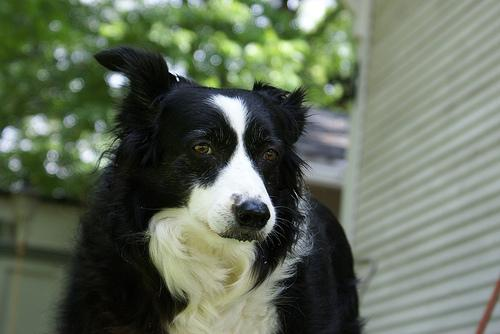

In [11]:
import random
from PIL import Image

#random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))
print(f'length of all images: {len(image_path_list)}')

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random
from PIL import Image
import matplotlib.pyplot as plt
import pathlib
from pathlib import Path

In [13]:
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(224,224)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [14]:
def plot_transformed_images(image_paths,transform, n=3,seed=42):
    """
    Selects random iamges from a paths of images and loads/transforms them plots the original vs the transformed version
    """

    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nsize: {f.size}')
            ax[0].axis(False)

            transformed_image = transform(f)
            ax[1].imshow(transformed_image.T)
            ax[1].set_title(f'Transformed\nShape: {transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'Class: {image_path.parent.stem}',fontsize=16)

<ipython-input-14-10105d5a73fa>:17: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  ax[1].imshow(transformed_image.T)


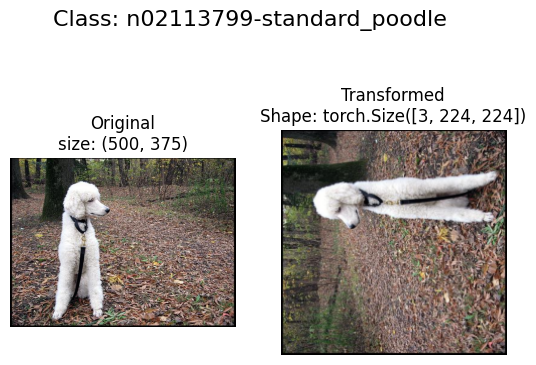

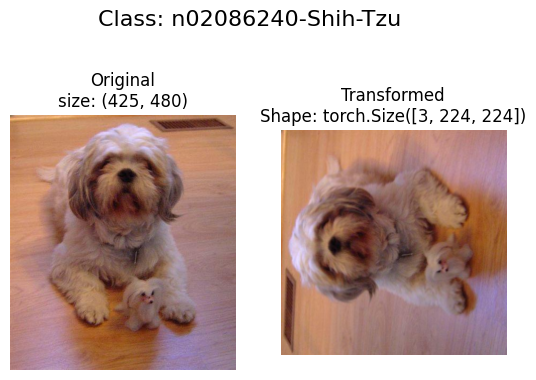

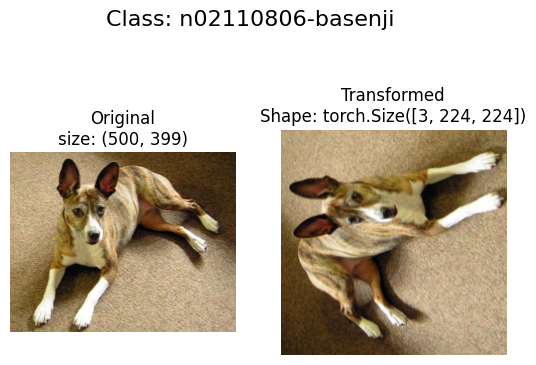

In [15]:
data_path = Path('data/')
image_path = data_path / 'dogs_breeds'

image_path_list = list(image_path.glob('*/*/*.jpg'))

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

In [16]:
import os
os.cpu_count()

8

In [17]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

target_directory = train_dir
print(f'Target directory: {target_directory}')

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
print(f'Classes names found: {class_names_found}')

Target directory: data/dogs_breeds/train
Classes names found: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk

In [18]:
def find_classes(directory):
    """Finds the class folder names in a target directory"""
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names cloud not be found
    if not classes:
        raise FileNotFoundError(f"Cloudn't find any classes in {directory}... please check file structure")

    # 3. Create a dictionary of index labels
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [19]:
find_classes(target_directory)

(['n02085620-Chihuahua',
  'n02085782-Japanese_spaniel',
  'n02085936-Maltese_dog',
  'n02086079-Pekinese',
  'n02086240-Shih-Tzu',
  'n02086646-Blenheim_spaniel',
  'n02086910-papillon',
  'n02087046-toy_terrier',
  'n02087394-Rhodesian_ridgeback',
  'n02088094-Afghan_hound',
  'n02088238-basset',
  'n02088364-beagle',
  'n02088466-bloodhound',
  'n02088632-bluetick',
  'n02089078-black-and-tan_coonhound',
  'n02089867-Walker_hound',
  'n02089973-English_foxhound',
  'n02090379-redbone',
  'n02090622-borzoi',
  'n02090721-Irish_wolfhound',
  'n02091032-Italian_greyhound',
  'n02091134-whippet',
  'n02091244-Ibizan_hound',
  'n02091467-Norwegian_elkhound',
  'n02091635-otterhound',
  'n02091831-Saluki',
  'n02092002-Scottish_deerhound',
  'n02092339-Weimaraner',
  'n02093256-Staffordshire_bullterrier',
  'n02093428-American_Staffordshire_terrier',
  'n02093647-Bedlington_terrier',
  'n02093754-Border_terrier',
  'n02093859-Kerry_blue_terrier',
  'n02093991-Irish_terrier',
  'n02094114-

In [20]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir, transform) -> None:
        super().__init__()
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index):
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    def __len__(self):
        "Returns the total number of samples"
        return len(self.paths)

    def __getitem__(self, index):
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [21]:
# Create a transform

train_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [22]:
# Test out ImageFolderCustom

train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [23]:
train_data_custom[0][0].shape

torch.Size([3, 224, 224])

In [24]:
train_data_custom.classes

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [25]:
train_data_custom.paths

[PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_1061.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_3006.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_2989.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_4332.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_2588.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_3865.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_5883.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_92.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_229.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_384.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_2824.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-Irish_setter/n02100877_585.jpg'),
 PosixPath('data/dogs_breeds/train/n02100877-

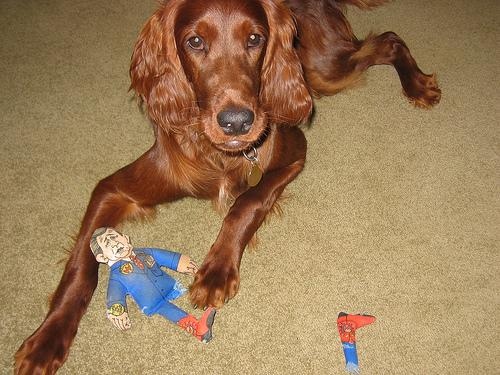

In [26]:
train_data_custom.load_image(42)

In [27]:
import random
def random_image_from_custom_dataset(dataset, n, seed):
    if seed:
        random.seed(seed)

    random_data_images = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16,8))

    for i, targ_sample in enumerate(random_data_images):
        targ_image = dataset[targ_sample][0]

        targ_image = targ_image.permute(1,2,0)

        plt.subplot(1,n,i+1)
        plt.imshow(targ_image)


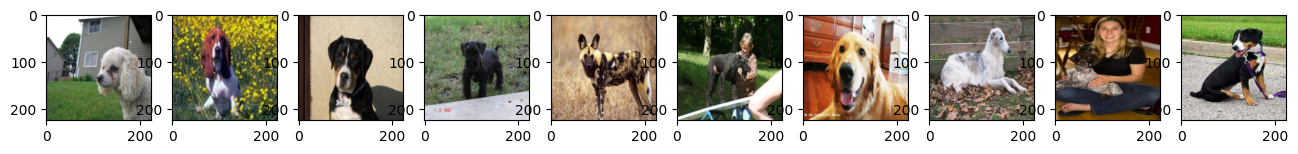

In [28]:
random_image_from_custom_dataset(train_data_custom,10,42)

In [29]:
from torch.utils.data import DataLoader
BATCH_SIZE = 64
NUM_WORKERS = 0
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7a2fa85afeb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a2fa85aff10>)

In [30]:
img, label = next(iter(train_dataloader_custom))
img.shape, label.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [31]:
from torchvision.models import resnet50, ResNet50_Weights
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [32]:
resnet50_model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
resnet50_model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 67.9MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [33]:
# Get single image
image_batch, label_batch = next(iter(train_dataloader_custom))
image_batch.shape

torch.Size([64, 3, 224, 224])

In [34]:
resnet50_model(image_batch.to(device))

tensor([[-0.6824,  0.2188,  0.4158,  ...,  1.2177,  0.5431, -0.6129],
        [ 0.1092, -0.3271, -0.0232,  ..., -0.1647,  0.3673,  0.3519],
        [ 0.1031, -0.0128, -0.4468,  ...,  0.7681, -0.4224, -0.5166],
        ...,
        [-0.3565,  0.1274, -0.2648,  ...,  0.6216,  0.3001,  1.1414],
        [-0.2056, -0.3898, -0.4139,  ..., -0.3785,  0.0389, -0.1675],
        [-0.2802, -0.0283,  0.5183,  ..., -0.5419,  0.6172,  0.1915]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [35]:
from tqdm.auto import tqdm

In [36]:
def train_step(model,dataloader,loss_fn,optimizer,accuracy_fn,device):
    loss, acc = 0, 0
    model.to(device)

    model.train()

    for batch, (img, label) in enumerate(dataloader):
        img, label = img.to(device), label.to(device)

        y_pred = model(img)

        loss_train = loss_fn(y_pred,label)
        loss += loss_train.item()

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        acc += accuracy_fn(y_pred_class,label).item()

    loss /= len(dataloader)
    acc /= len(dataloader)

    return loss, acc

In [37]:
def test_step(model,dataloader,loss_fn,accuracy_fn,device):
    loss, acc = 0, 0
    model.to(device)

    model.eval()
    with torch.inference_mode():
        for batch, (img, label) in enumerate(dataloader):
            img, label = img.to(device), label.to(device)

            y_pred = model(img)
            loss+=loss_fn(y_pred,label).item()

            y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
            acc+=accuracy_fn(y_pred_class,label).item()

        loss /= len(dataloader)
        acc /= len(dataloader)

        return loss, acc


In [38]:
def train_test_loop(model,epochs,train_dataloader,test_dataloader,loss_fn,accuracy_fn,optimizer,device):

    results = {'train_loss': [],
               'train_acc': [],
               'test_loss':[],
               'test_acc':[]}

    for epoch in tqdm(range(epochs)):
        print(f'_____EPCOCH:{epoch}_____')

        train_loss, train_acc = train_step(model=model,
                   dataloader=train_dataloader,
                   loss_fn=loss_fn,
                   accuracy_fn=accuracy_fn,
                   optimizer=optimizer,
                   device=device)

        test_loss, test_acc = test_step(model=model,
                  dataloader=test_dataloader,
                  loss_fn=loss_fn,
                  accuracy_fn=accuracy_fn,
                  device=device)

        print(f'Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}')

        results['test_acc'].append(test_acc)
        results['test_loss'].append(test_loss)
        results['train_acc'].append(train_acc)
        results['train_loss'].append(train_loss)

    return results

In [39]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 11.7 MB/s eta 0:00:00


In [40]:
import torchmetrics
from torch import nn

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(resnet50_model.parameters(),lr=0.01, momentum=0.9)
accuracy_fn = torchmetrics.Accuracy(task='multiclass',num_classes=len(train_data_custom.classes)).to(device)
NUM_EPOCHS = 20
resnet50_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
resnet50_model_result = train_test_loop(model=resnet50_model,
                            train_dataloader=train_dataloader_custom,
                            test_dataloader=test_dataloader_custom,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            optimizer=optimizer,
                            epochs=NUM_EPOCHS,
                            device=device)

resnet50_model_result

  0%|          | 0/20 [00:00<?, ?it/s]

_____EPCOCH:0_____
Train loss: 2.3433 | Train acc: 0.5185 | test loss: 0.7649 | test acc: 0.7744
_____EPCOCH:1_____
Train loss: 0.5198 | Train acc: 0.8393 | test loss: 0.7596 | test acc: 0.7797
_____EPCOCH:2_____
Train loss: 0.3021 | Train acc: 0.9053 | test loss: 0.6704 | test acc: 0.8079
_____EPCOCH:3_____
Train loss: 0.1987 | Train acc: 0.9364 | test loss: 0.7116 | test acc: 0.8056
_____EPCOCH:4_____
Train loss: 0.1392 | Train acc: 0.9578 | test loss: 0.6562 | test acc: 0.8254
_____EPCOCH:5_____
Train loss: 0.0875 | Train acc: 0.9732 | test loss: 0.7712 | test acc: 0.7966
_____EPCOCH:6_____
Train loss: 0.0677 | Train acc: 0.9794 | test loss: 0.6624 | test acc: 0.8275
_____EPCOCH:7_____
Train loss: 0.0437 | Train acc: 0.9892 | test loss: 0.6444 | test acc: 0.8307
_____EPCOCH:8_____
Train loss: 0.0352 | Train acc: 0.9908 | test loss: 0.6787 | test acc: 0.8302
_____EPCOCH:9_____
Train loss: 0.0300 | Train acc: 0.9924 | test loss: 0.6140 | test acc: 0.8490
_____EPCOCH:10_____
Train loss

{'train_loss': [2.3432840695676878,
  0.5198444804941961,
  0.30212737640091614,
  0.1986625095352877,
  0.1392257507644998,
  0.08754914303765048,
  0.06767833886249353,
  0.04365326432771115,
  0.03516690068437841,
  0.03003099133700941,
  0.02063543194735264,
  0.02172931945294344,
  0.020821421181100832,
  0.018752076434307232,
  0.017997575158076432,
  0.01565820871073529,
  0.01791189981163335,
  0.01225682091876655,
  0.008345470300450552,
  0.009565377849571104],
 'train_acc': [0.5185440891934919,
  0.8392805233020191,
  0.9052688953026321,
  0.9363977712716243,
  0.9577882751937985,
  0.9731710271317829,
  0.9794089147286822,
  0.9892199612403101,
  0.9907945736434108,
  0.9923691860465116,
  0.9950339147286822,
  0.9943556201088336,
  0.9941860465116279,
  0.9940164729144222,
  0.9952761627906976,
  0.9957606589147286,
  0.9947311046511628,
  0.9966085271317829,
  0.997577519379845,
  0.9967902131782945],
 'test_loss': [0.7648605030316573,
  0.7596430264986478,
  0.6703540199

In [43]:
def plot_loss_curves(results):

    loss = results['train_loss']
    test_loss = results['test_loss']

    acc = results['train_acc']
    test_acc = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label='train_loss')
    plt.plot(epochs,test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs,acc,label='train_acc')
    plt.plot(epochs,test_acc, label='test_acc')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

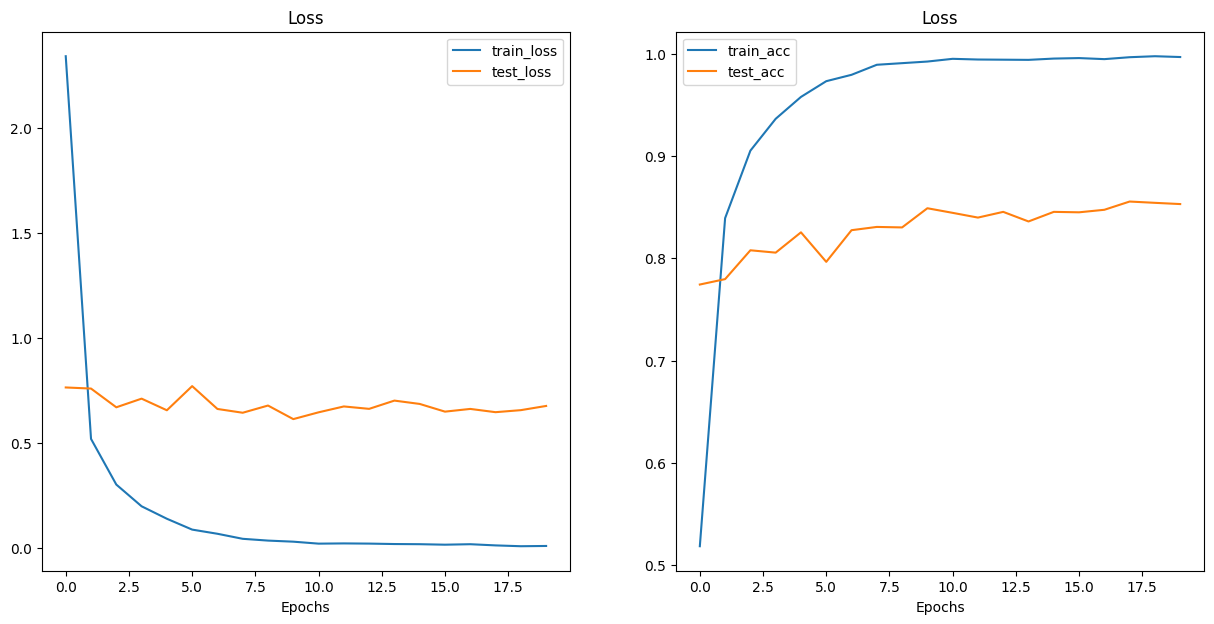

In [44]:
plot_loss_curves(resnet50_model_result)

In [45]:
import requests

# Setup custom image path
id = 9
custom_image_path = data_path / f"apollo{id}.jpeg"

# Download the image if it doesn't exist

if not custom_image_path.is_file():
    with open(custom_image_path, 'wb') as f:
        req = requests.get(f'https://github.com/tenonin/apollo-photos/raw/main/{id}.jpg')
        print(f'Downloading {custom_image_path}...')
        f.write(req.content)
else:
    print(f'{custom_image_path} already exists...')

In [46]:
!pip install torchvision

In [47]:
import torchvision

def pred_image_class(model,path,size,class_names):
    image = torchvision.io.read_image(str(path)).type(torch.float32) / 255.
    image_transform = transforms.Compose([
        transforms.Resize(size=(size,size))
    ])
    image_transformed = image_transform(image)

    model.cpu()
    model.eval()
    with torch.inference_mode():
        image_pred = model(image_transformed.unsqueeze(0))
        image_pred_prob = torch.softmax(image_pred,dim=1)
        threshold = image_pred_prob.topk(1,dim=1).values.item()
        image_pred_label = torch.argmax(image_pred_prob,dim=1).cpu()
        if threshold >= 0.7:
          plt.title(f'Breed: {class_names[image_pred_label]}')
          plt.imshow(image_transformed.permute(1,2,0))

          return class_names[image_pred_label]
        plt.title(f"Cloud be {class_names[image_pred_label]} with {threshold*100:.2f}%?")
        plt.imshow(image_transformed.permute(1,2,0))
        return "Can't reconize dog breed"


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


'n02112018-Pomeranian'

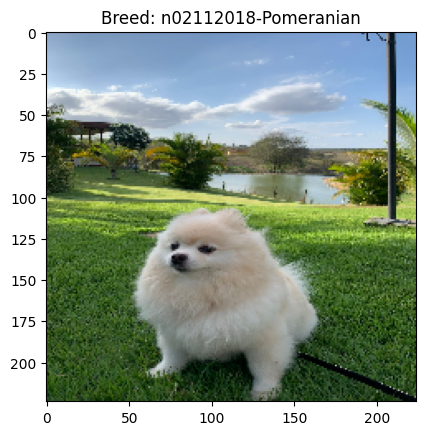

In [48]:
pred = pred_image_class(model=resnet50_model,path=f'data/apollo{id}.jpeg',size=224,class_names=class_names_found)
pred

In [49]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME = 'resnet_model_with_imagenet_weights_v1.pth'

MODEL_PATH_NAME = MODEL_PATH / MODEL_NAME
model_scripted = torch.jit.script(resnet50_model)
model_scripted.save(MODEL_PATH_NAME)

In [50]:
get_model = torch.jit.load(MODEL_PATH_NAME)
get_model

RecursiveScriptModule(
  original_name=ResNet
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
  (layer1): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=Bottleneck
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (conv2): RecursiveScriptModule(original_name=Conv2d)
      (bn2): RecursiveScriptModule(original_name=BatchNorm2d)
      (conv3): RecursiveScriptModule(original_name=Conv2d)
      (bn3): RecursiveScriptModule(original_name=BatchNorm2d)
      (relu): RecursiveScriptModule(original_name=ReLU)
      (downsample): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_name=B

In [51]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device='cuda'):

    loss, acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for img, label in tqdm(data_loader):
            y_pred = model(img.to(device))

            loss += loss_fn(y_pred,label.to(device))
            acc += accuracy_fn(y_pred.squeeze().argmax(dim=1),label.to(device))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        'model_name': model.__class__.__name__,
        'model_accuracy': acc.item(),
        'model_loss': loss.item()
    }


In [52]:
model_result = eval_model(model=get_model,
                   data_loader=test_dataloader_custom,
                   loss_fn=loss_fn,
                   accuracy_fn=accuracy_fn,
                   device=device)
model_result

  0%|          | 0/65 [00:00<?, ?it/s]

{'model_name': 'RecursiveScriptModule',
 'model_accuracy': 0.853044867515564,
 'model_loss': 0.6767492890357971}

In [53]:
import requests

# Setup custom image path
id = 9
custom_image_path = data_path / f"apollo{id}.jpeg"

# Download the image if it doesn't exist

if not custom_image_path.is_file():
    with open(custom_image_path, 'wb') as f:
        req = requests.get(f'https://github.com/tenonin/apollo-photos/raw/main/apollo{id}.jpg')
        print(f'Downloading {custom_image_path}...')
        f.write(req.content)
else:
    print(f'{custom_image_path} already exists...')

data/apollo9.jpeg already exists...


<function __main__.pred_image_class(model, path, size, class_names)>

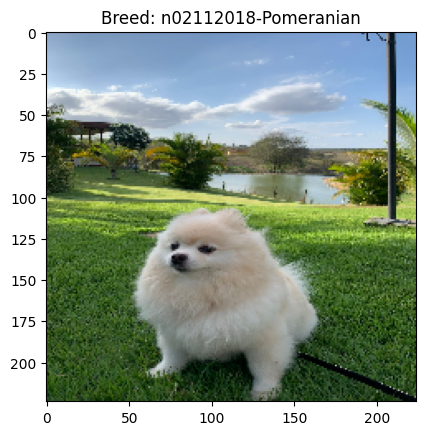

In [54]:
pred_image_class(model=get_model,path=f'data/apollo{id}.jpeg',size=224,class_names=class_names_found)
pred_image_class